## Import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [ ]:
pre_path = "../../../../../../../"
physical_model = "MIST"
path_to_data = pre_path + "data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = pre_path + "results/K_fold/"
path_to_predictions = pre_path + "predictions/K_fold/"
tag = "T_eff_bigger_3_6"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


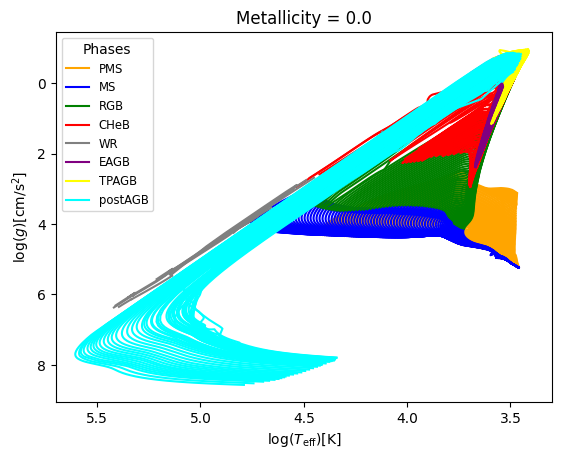

In [4]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [5]:
print_uniques("log_Teff", iso_df)
# print_uniques_count("log_Teff", iso_df)

log_Teff : 1467122 unique values, range [3.3446573874911043, 5.605500299983011]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


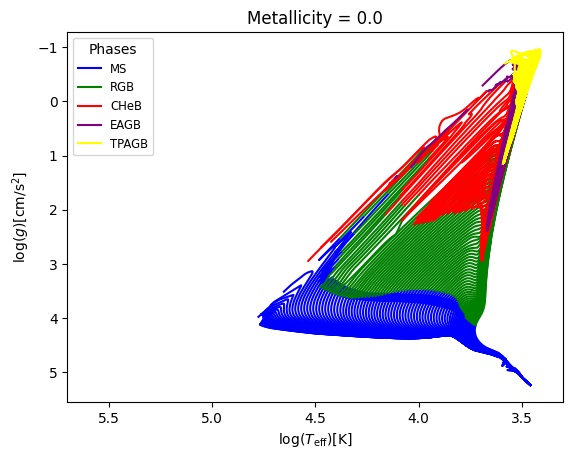

In [6]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [7]:
print_uniques("log_Teff", phase_filtered_iso_df)
# print_uniques_count("log_Teff", phase_filtered_iso_df)

log_Teff : 1140744 unique values, range [3.344668191350628, 5.378801600728572]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
764330,10.3,3.606231,1.881705,3.0,0.50,0.866623,1.247122
764331,10.3,3.604908,1.863536,3.0,0.50,0.866620,1.256206
764332,10.3,3.603606,1.845452,3.0,0.50,0.866618,1.265248
764333,10.3,3.602322,1.827453,3.0,0.50,0.866616,1.274247


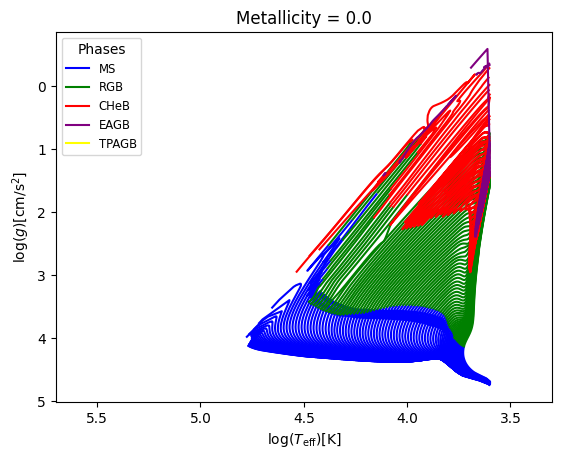

In [8]:
phase_Teff_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], 'log_Teff' : (">", 3.6)})
display(phase_Teff_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_Teff_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [9]:
print_all_uniques(phase_Teff_filtered_iso_df)

log10_isochrone_age_yr  : Range : 5.0 - 10.3, Mean : 8.1805, Median : 8.25

log_Teff  : Range : 3.6 - 5.3788, Mean : 3.9766, Median : 3.8629

log_g  : Range : -0.61 - 6.2594, Mean : 2.9438, Median : 3.2773

Values in phase column : 0.0, 2.0, 3.0, 4.0, 5.0 

Values in metallicity column : -0.25, -0.5, -0.75, -1.0, -1.25, -1.5, -1.75, -2.0, -2.5, -3.0, -3.5, -4.0, 0.0, 0.25, 0.5 

star_mass  : Range : 0.1 - 298.5448, Mean : 10.266, Median : 2.7375

log_R  : Range : -0.98 - 3.0541, Mean : 1.0184, Median : 0.9857



In [10]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_Teff_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.1037788473995507 - 298.5447575808816
Median value in train data for the mass parameter: 2.7386302806888607
Mean value in train data for the mass parameter: 10.26454477808255
Range in train data for the radius parameter : -0.9779888690295035 - 3.0540865173464766
Median value in train data for the radius parameter: 0.9859195849676272
Mean value in train data for the radius parameter: 1.0183475269632383

Testing set statistics:
Range in test data for the mass parameter : 0.1065955063171224 - 294.5465604638386
Median value in test data for the mass parameter: 2.734396758841152
Mean value in test data for the mass parameter: 10.270249894779996
Range in test data for the radius parameter : -0.9724652524766658 - 3.054054613695803
Median value in test data for the radius parameter: 0.9849665566633656
Mean value in test data for the radius parameter: 1.0186433964267805

(573251, 4) (191084, 4)
(573251, 2) (191084, 2)


## Model training

### Linear regression

In [11]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_6 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.32926581877451055
RMSE :  20.06122133754321
MAE :  9.640411983589328
MedAE :  5.634957972255092
CORR :  0.573816886367429
MAX_ER :  256.9350554950853
Percentiles : 
  75th percentile :  12.604890993700074
  90th percentile :  17.09539932705423
  95th percentile :  20.196330041683275
  99th percentile :  87.93130651028595



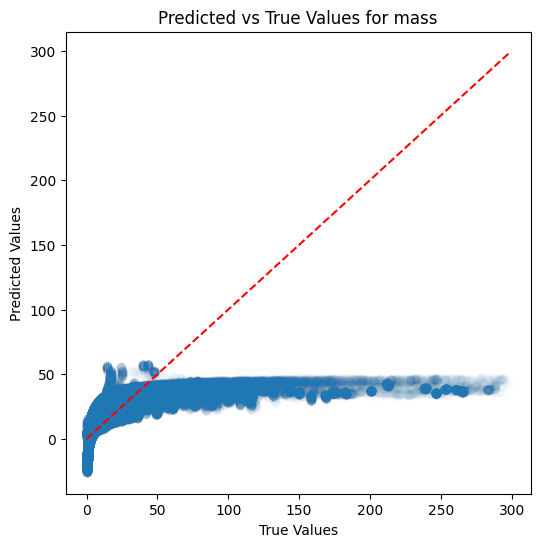

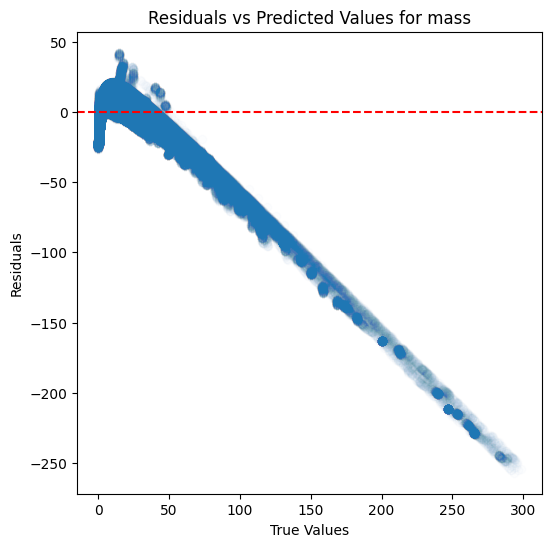

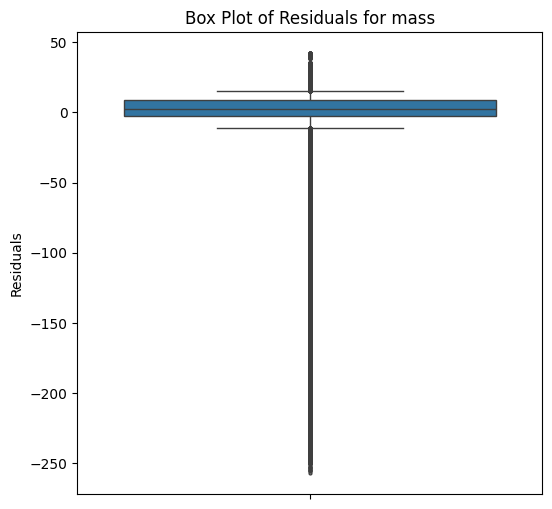

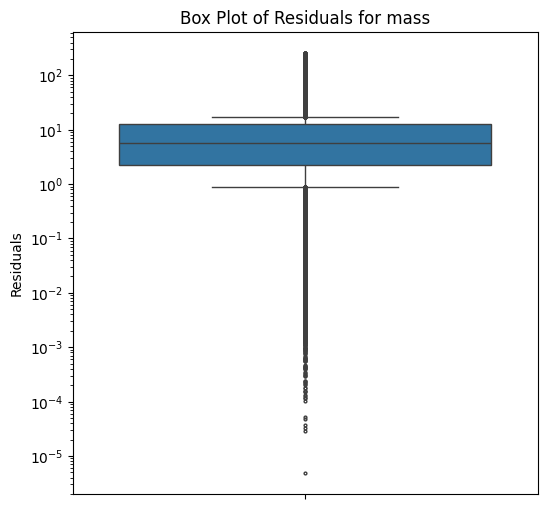

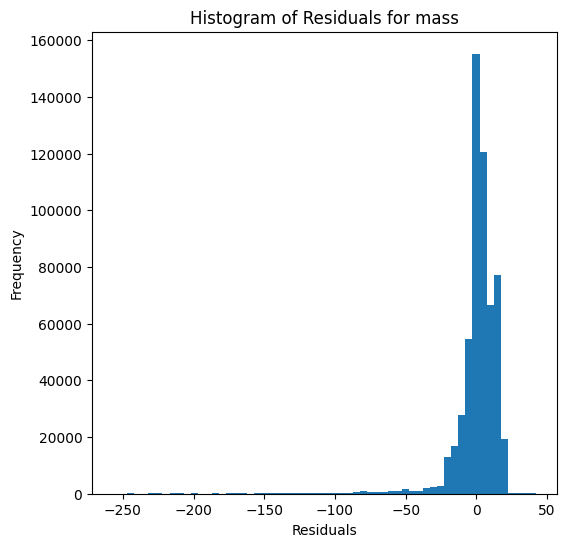

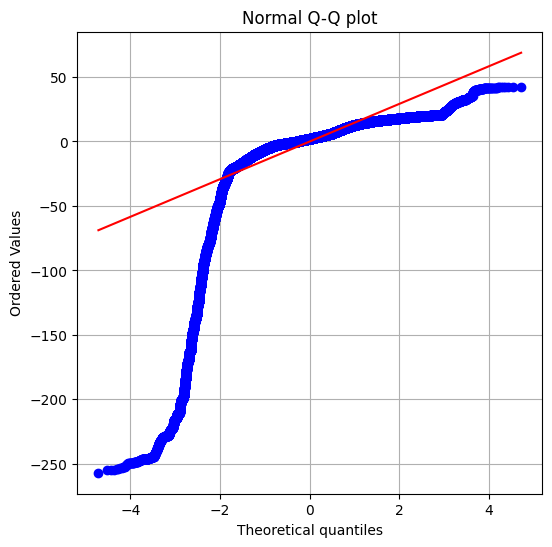


radius results:
RVE :  0.9862313036632091
RMSE :  0.09400277642343773
MAE :  0.07033569369989583
MedAE :  0.05480716801275376
CORR :  0.9930917901499634
MAX_ER :  0.4876688929958404
Percentiles : 
  75th percentile :  0.09725657050299688
  90th percentile :  0.14889782014280772
  95th percentile :  0.18571722341253483
  99th percentile :  0.31004259714364824



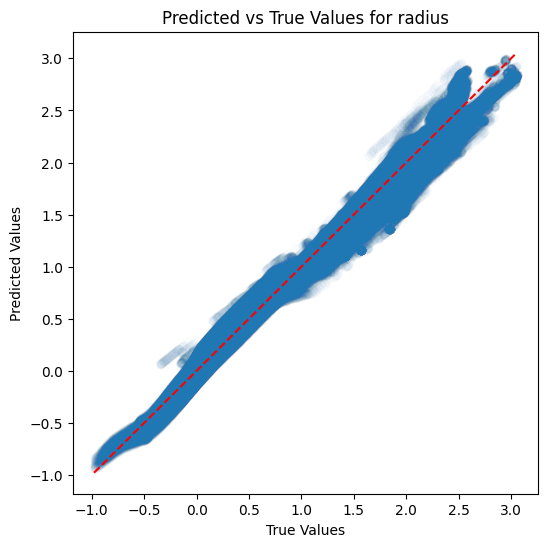

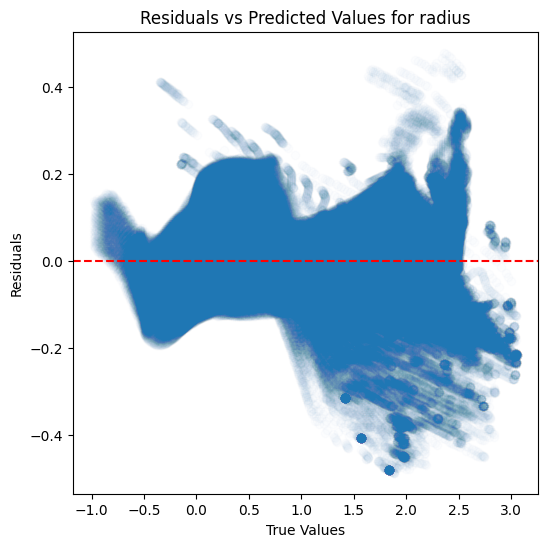

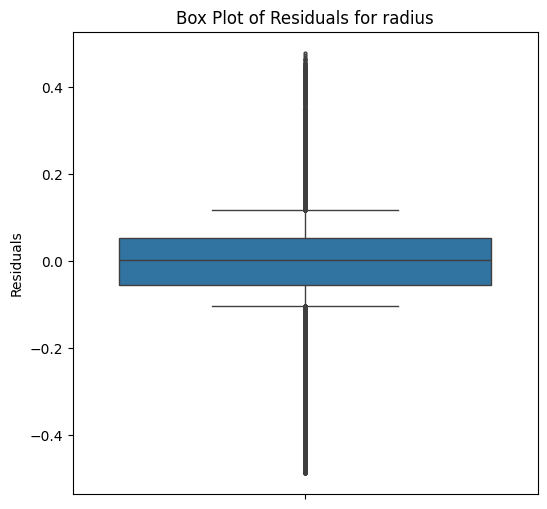

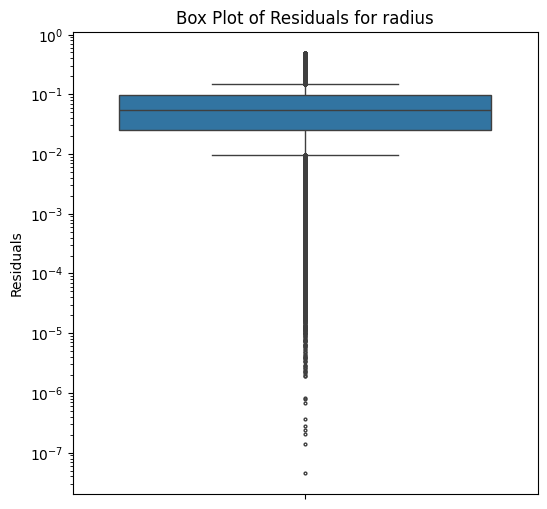

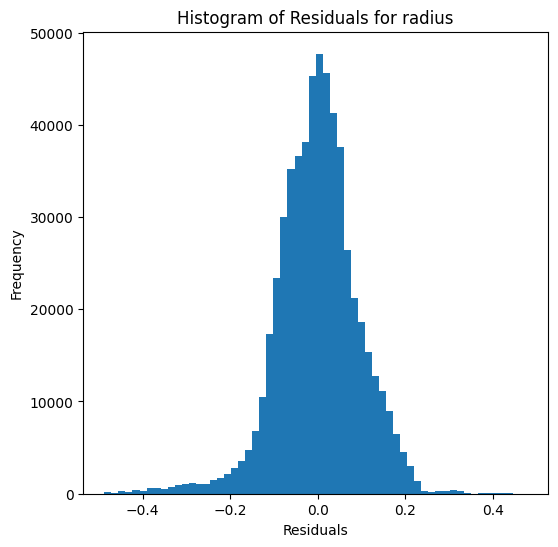

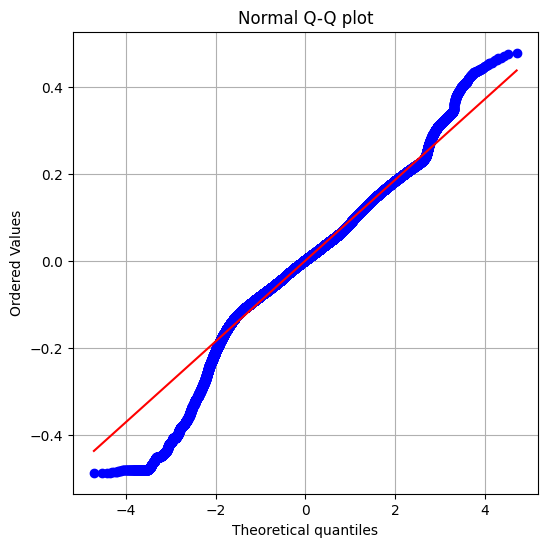

In [12]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [13]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_6 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9947872048017296
RMSE :  1.7685556798838993
MAE :  0.17434518434294122
MedAE :  0.0038680488748434882
CORR :  0.9973956504107363
MAX_ER :  159.95419494148862
Percentiles : 
  75th percentile :  0.02018979773052143
  90th percentile :  0.09642039595231822
  95th percentile :  0.2823282951064918
  99th percentile :  3.5915801597597365



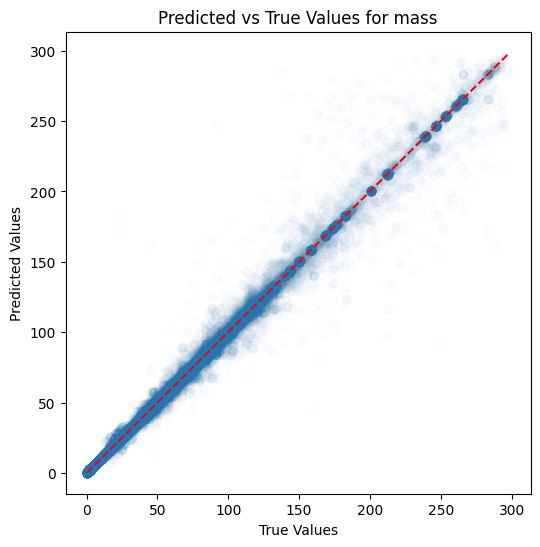

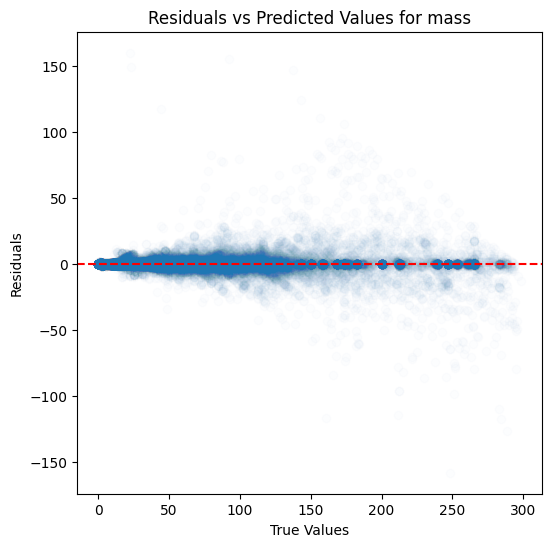

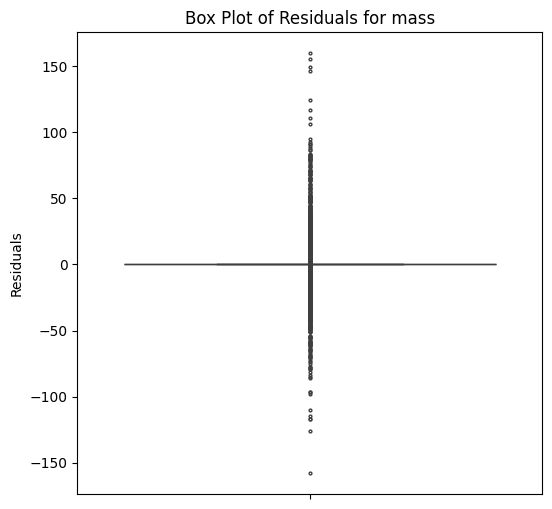

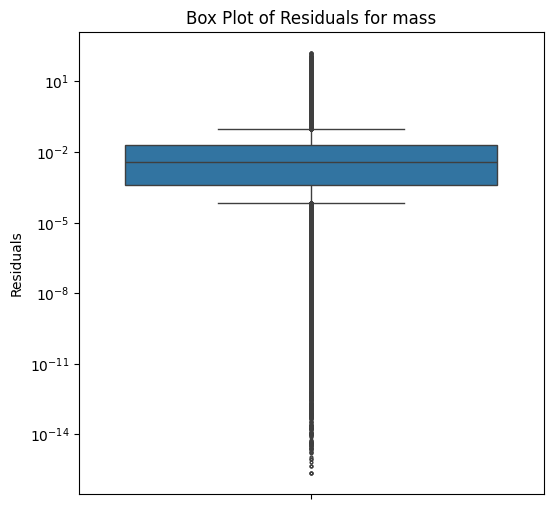

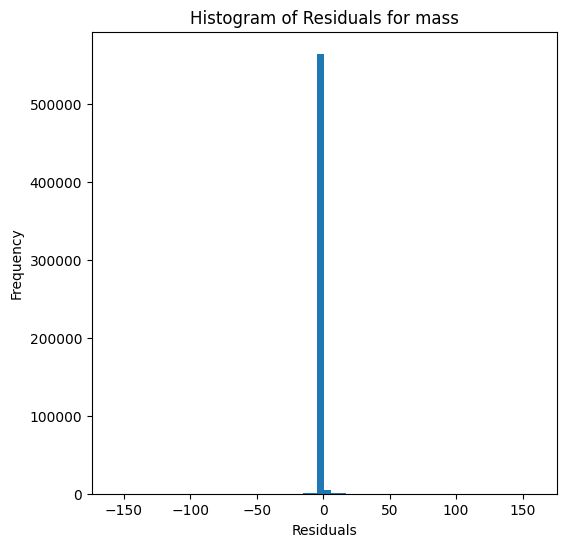

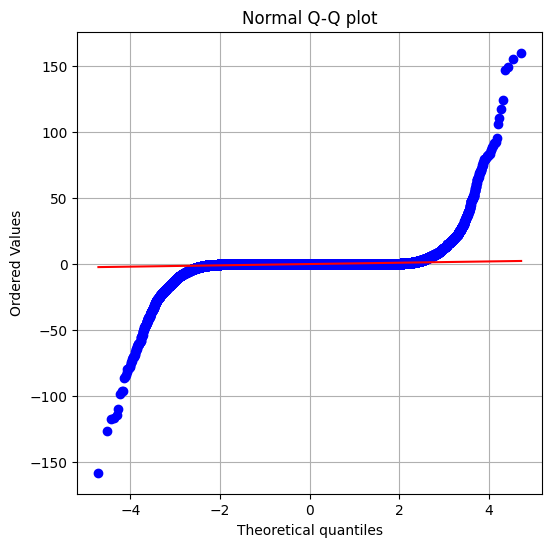


radius results:
RVE :  0.9998290851240951
RMSE :  0.010473406875712509
MAE :  0.005841969125846199
MedAE :  0.0034009011429119163
CORR :  0.9999145728475541
MAX_ER :  0.5592800912707052
Percentiles : 
  75th percentile :  0.0073711854722418035
  90th percentile :  0.01305806439161672
  95th percentile :  0.018505014278527354
  99th percentile :  0.03957092634595738



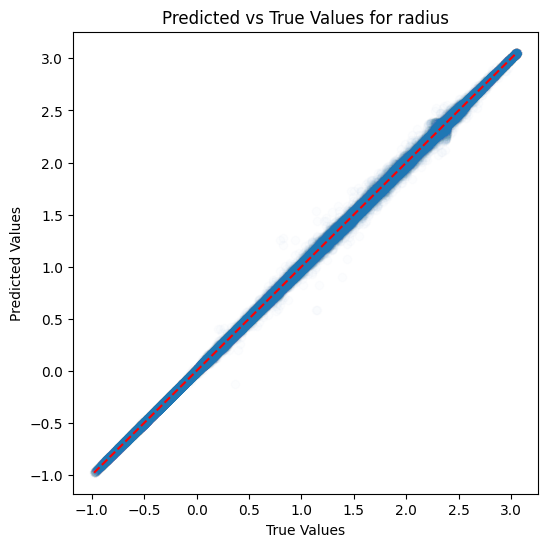

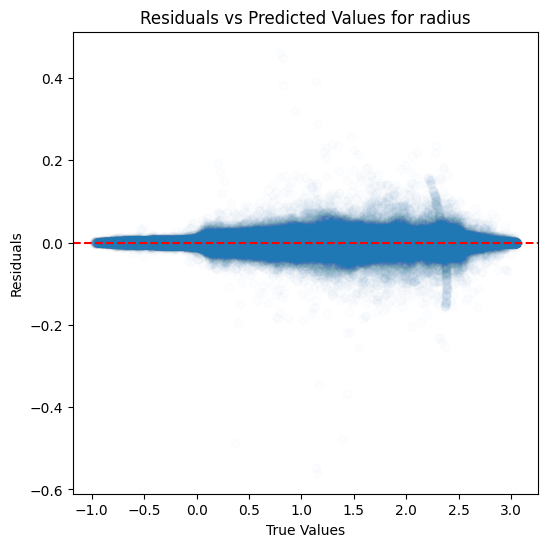

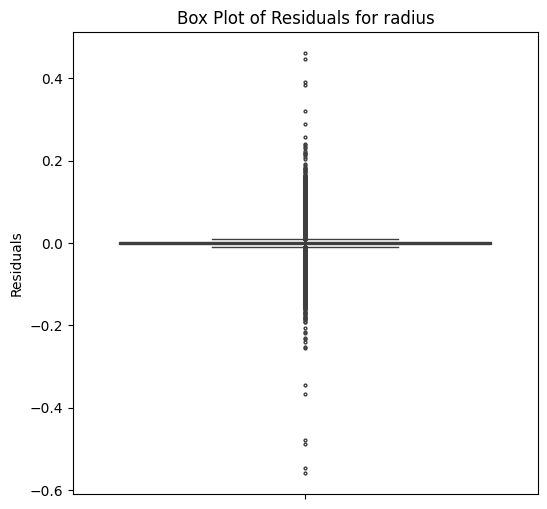

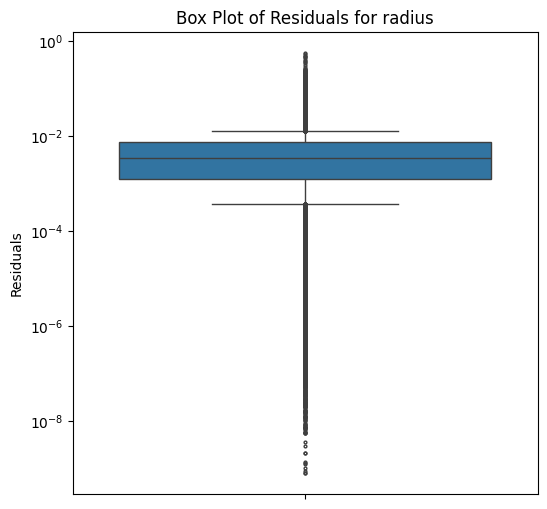

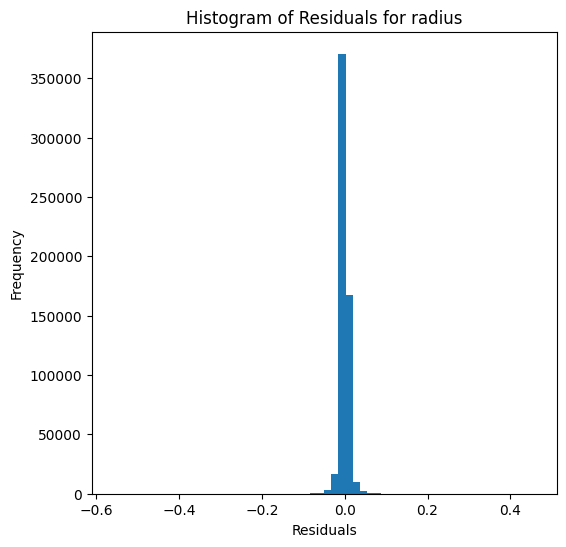

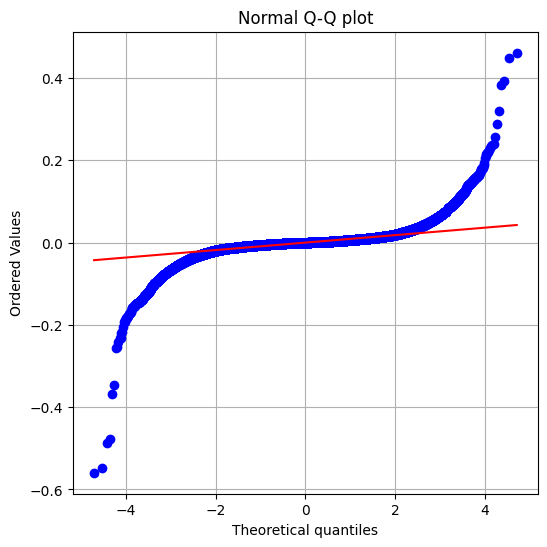

In [14]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [15]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_6 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9900131287830239
RMSE :  2.4483288499798657
MAE :  0.27700341024048036
MedAE :  0.00984484373839939
CORR :  0.9950929393589985
MAX_ER :  184.7806332817721
Percentiles : 
  75th percentile :  0.045218019721935954
  90th percentile :  0.1878418668423958
  95th percentile :  0.5524991173558256
  99th percentile :  5.526215050847689



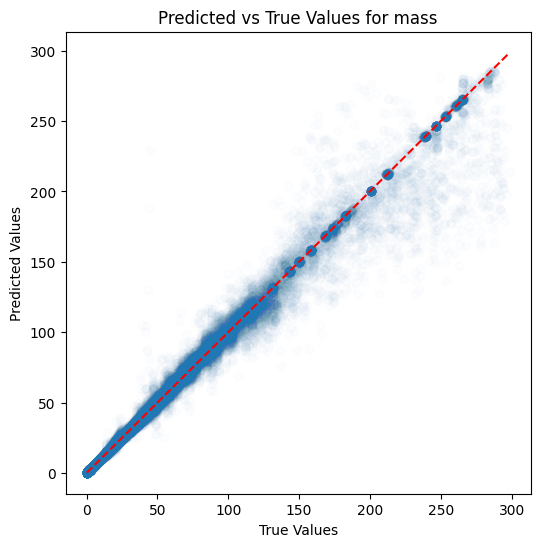

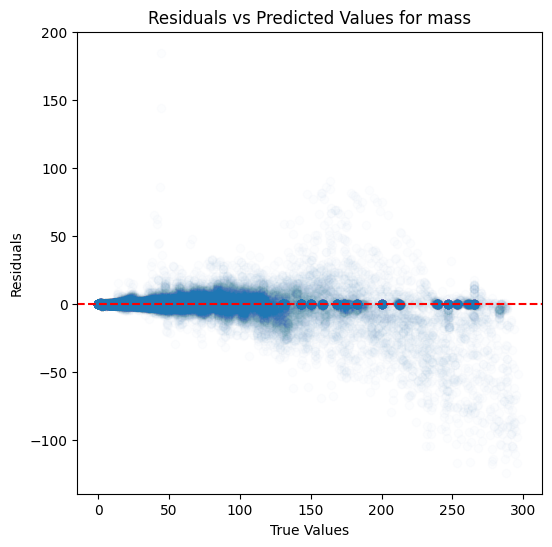

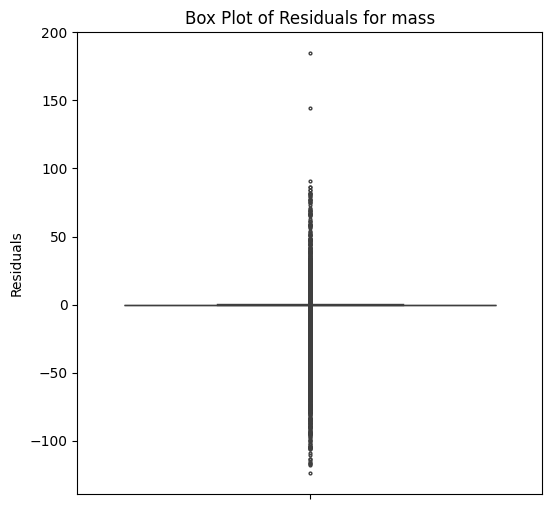

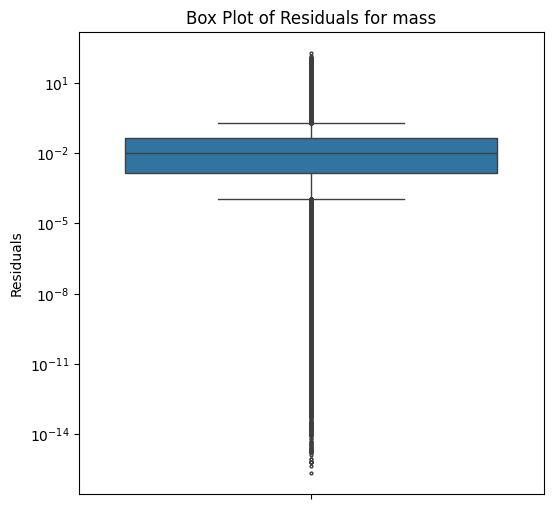

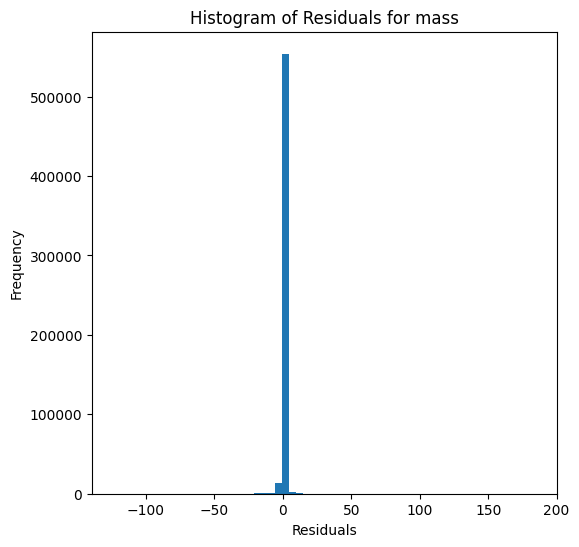

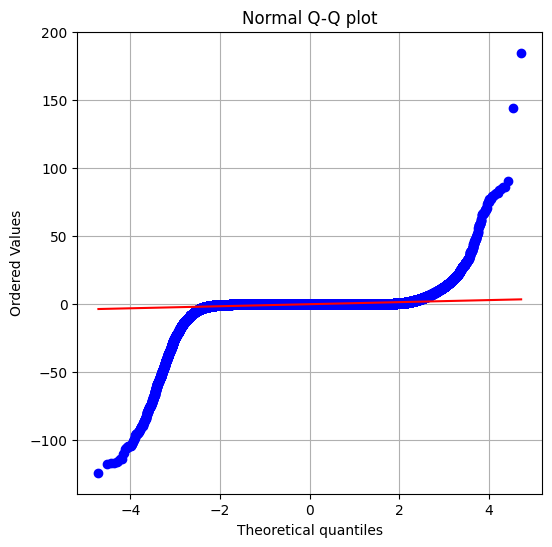


radius results:
RVE :  0.9999180008490599
RMSE :  0.00725508415315695
MAE :  0.004123470973457216
MedAE :  0.0025218852691907268
CORR :  0.99995900608935
MAX_ER :  0.37505245473666105
Percentiles : 
  75th percentile :  0.00509864001734886
  90th percentile :  0.009279117007835569
  95th percentile :  0.012839055728210425
  99th percentile :  0.025529318949926105



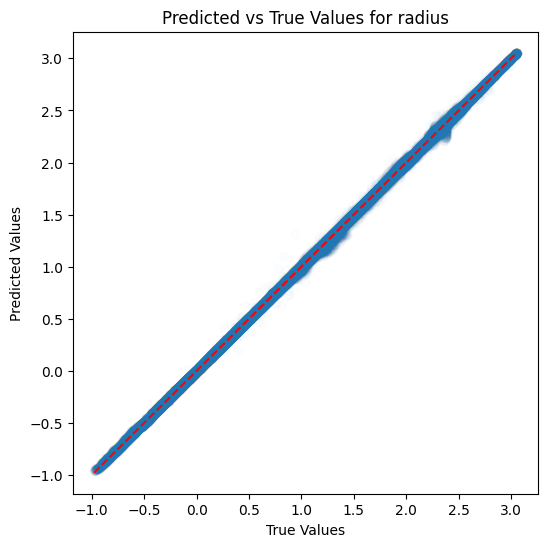

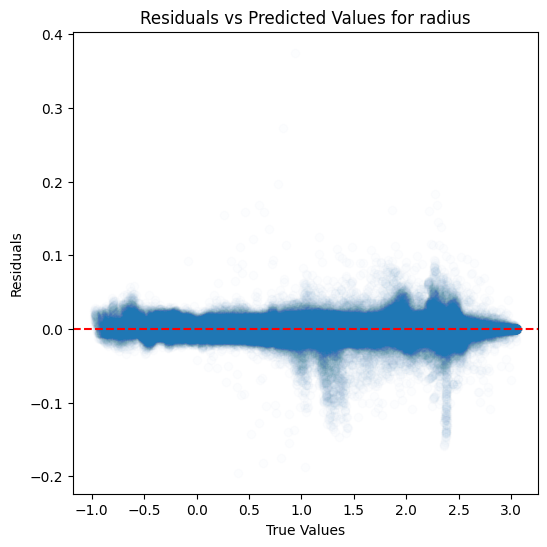

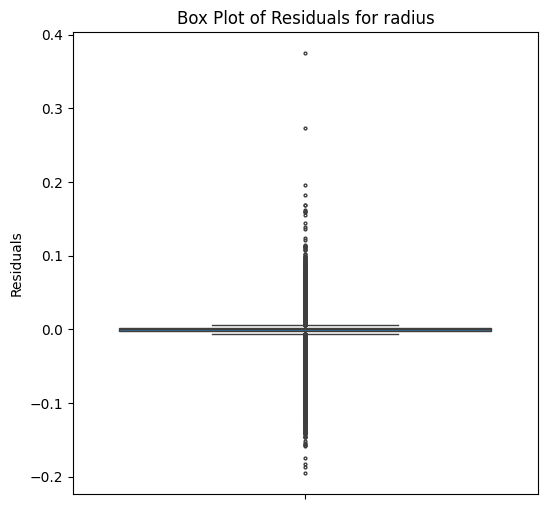

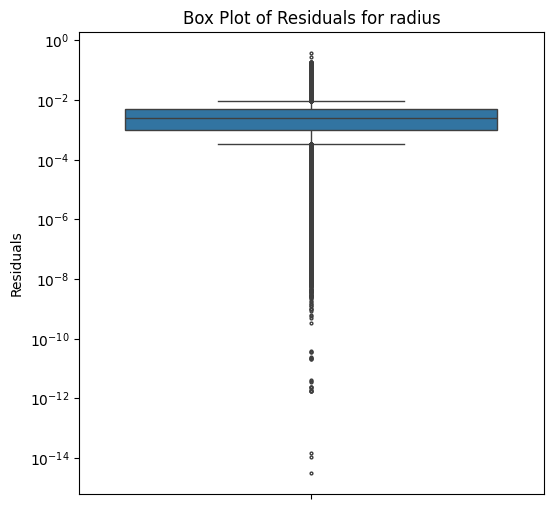

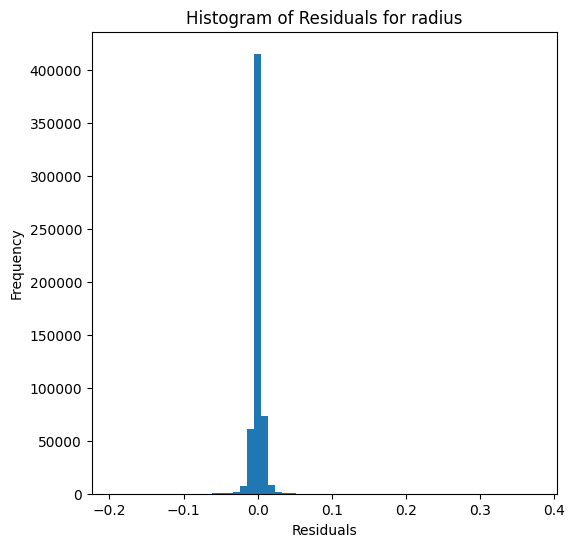

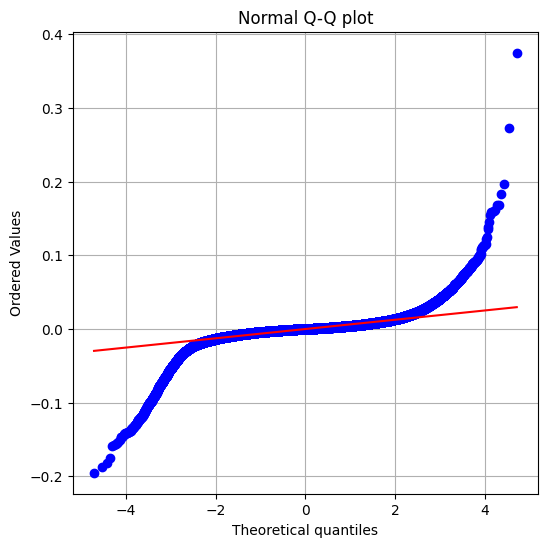

In [16]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [17]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_6 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9977104486157674
RMSE :  1.1720835921410973
MAE :  0.12591780979625317
MedAE :  0.0051064345176423664
CORR :  0.9988554767379744
MAX_ER :  124.61452079883531
Percentiles : 
  75th percentile :  0.01832826497147866
  90th percentile :  0.07578601842479671
  95th percentile :  0.2239595139073396
  99th percentile :  2.5937873914825147



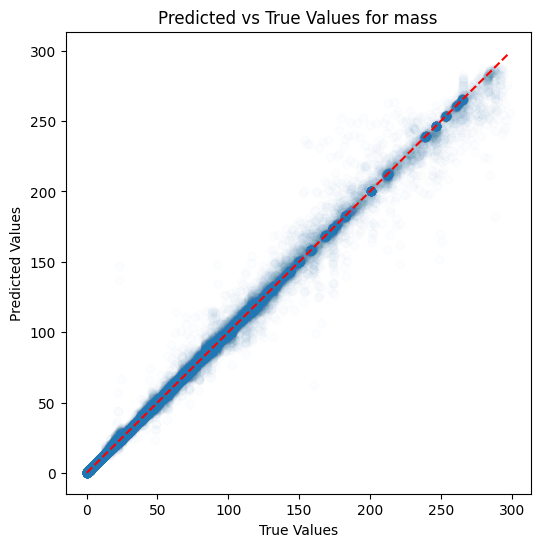

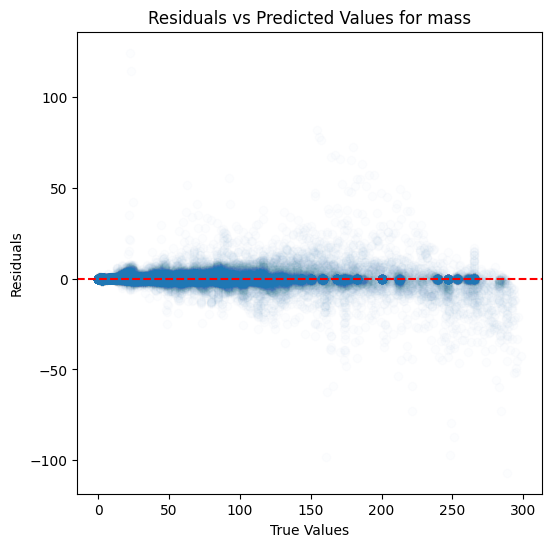

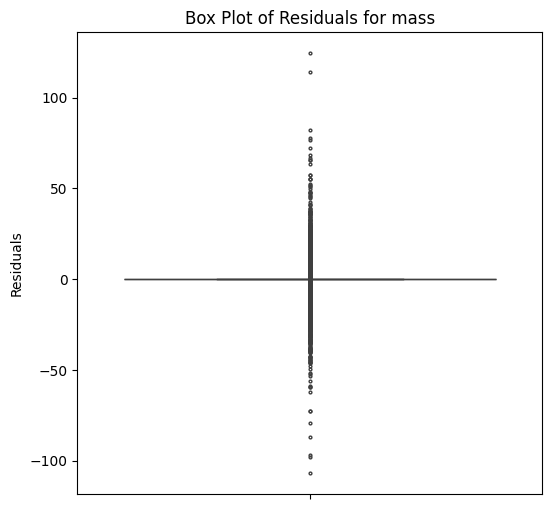

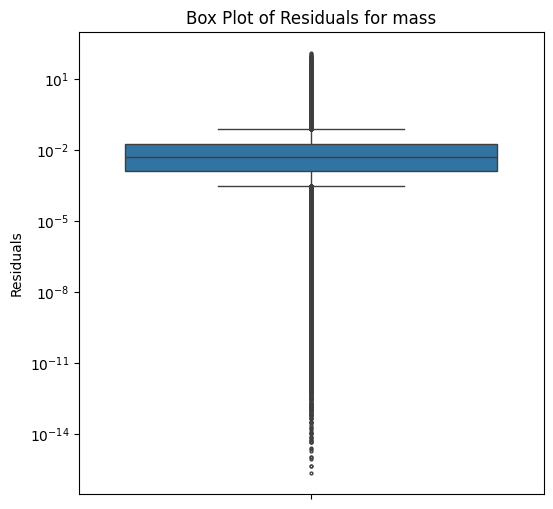

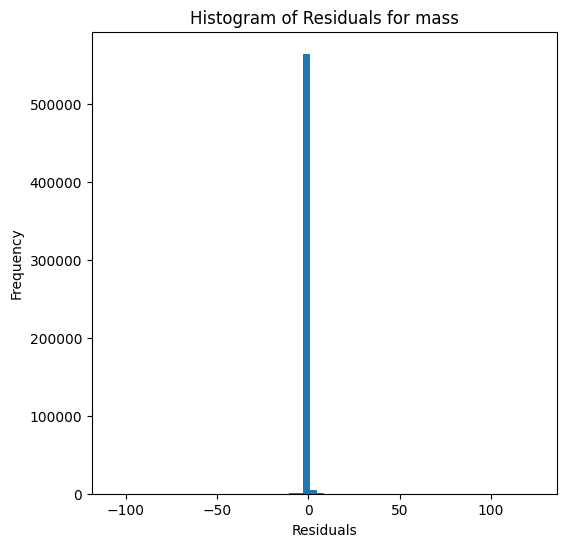

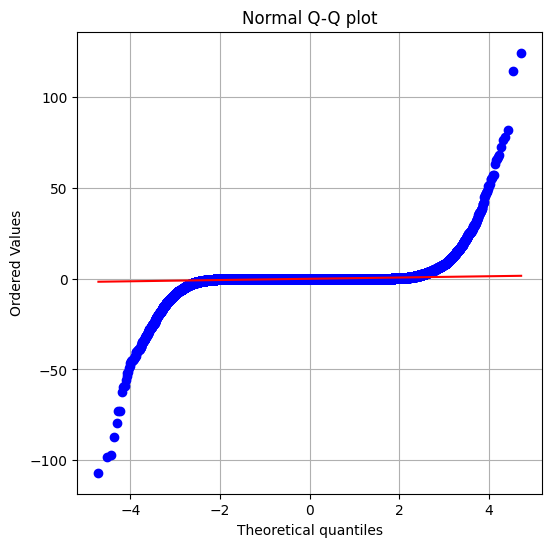


radius results:
RVE :  0.9999507449969522
RMSE :  0.0056224918763719935
MAE :  0.002855991285684347
MedAE :  0.0014360275148779245
CORR :  0.9999753729119454
MAX_ER :  0.35219599891771536
Percentiles : 
  75th percentile :  0.003402823367857688
  90th percentile :  0.006769810908908269
  95th percentile :  0.009955390600419167
  99th percentile :  0.020458739574112372



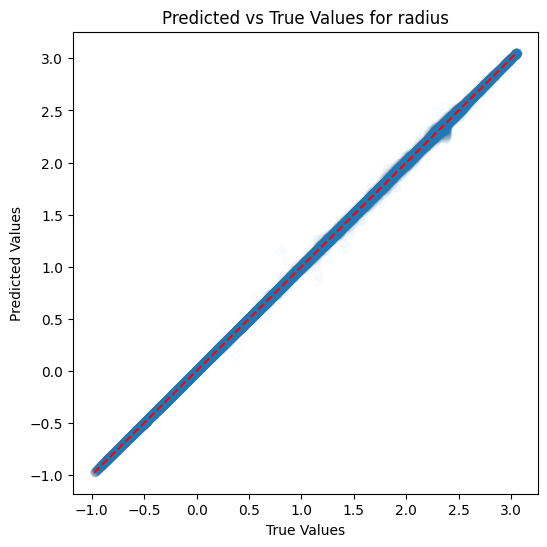

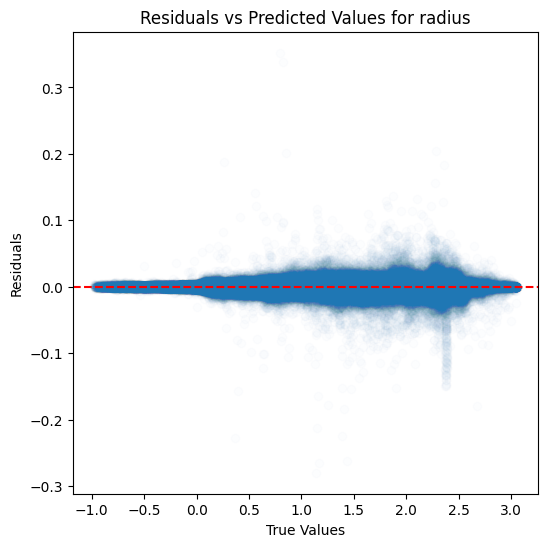

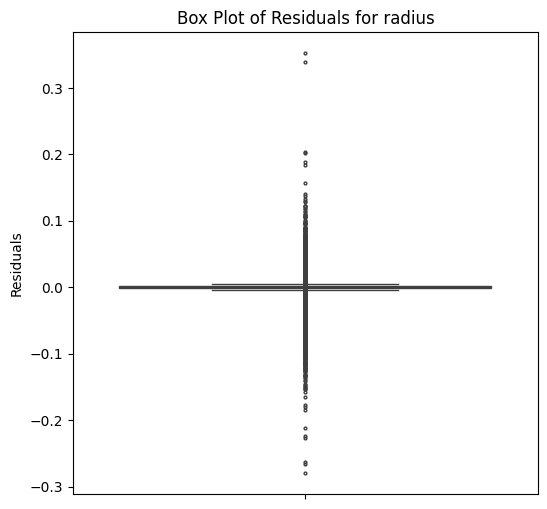

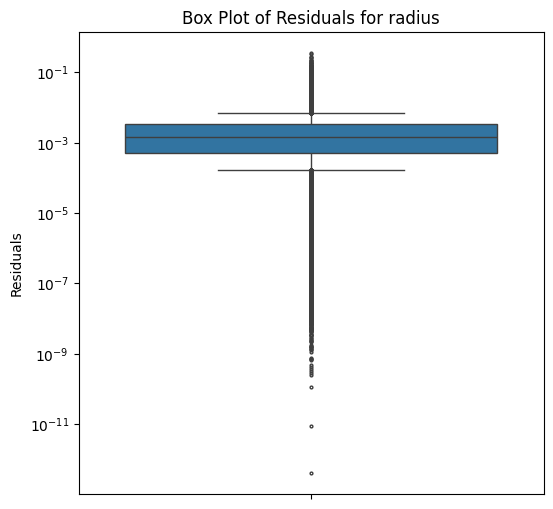

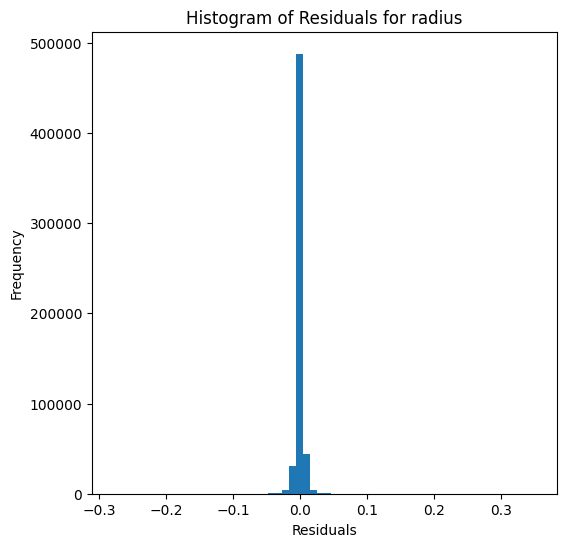

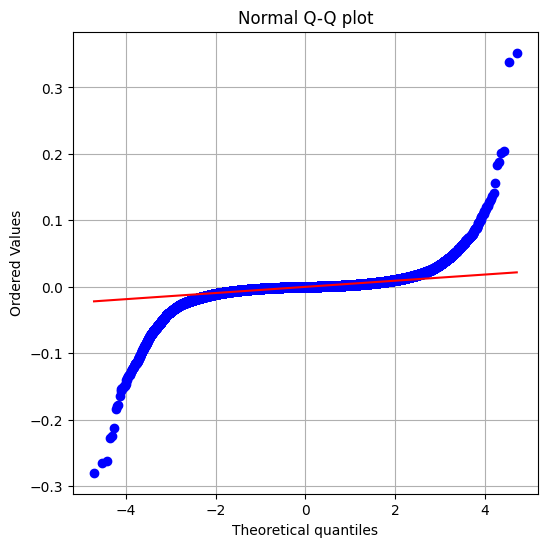

In [18]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [19]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_6 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9940058862698647
RMSE :  1.896464166470461
MAE :  0.4793808781112664
MedAE :  0.10451926645470827
CORR :  0.9969991268041856
MAX_ER :  77.25455047375834
Percentiles : 
  75th percentile :  0.2641073216535328
  90th percentile :  0.8059292698791509
  95th percentile :  1.8486761222885644
  99th percentile :  7.582003269700291



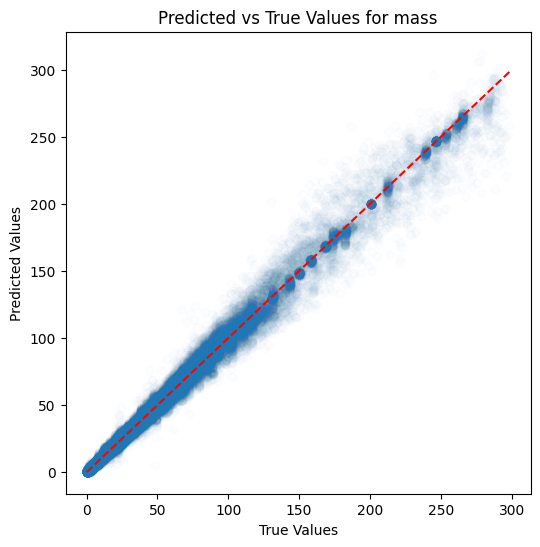

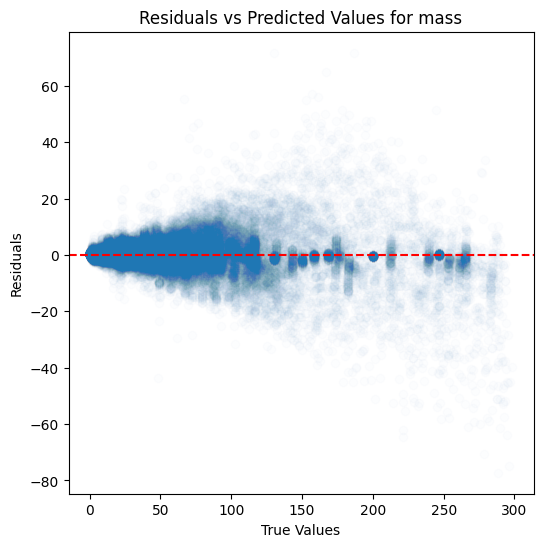

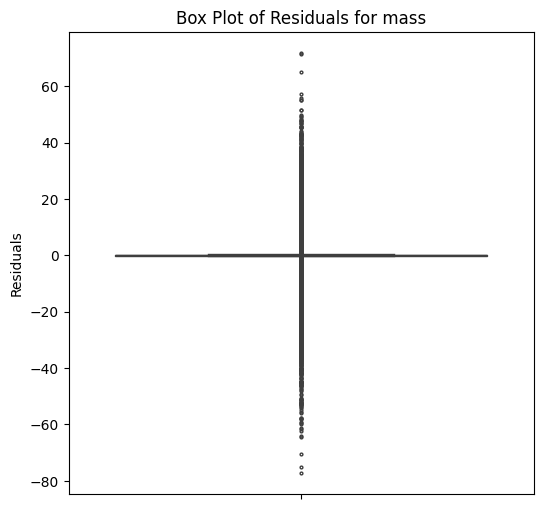

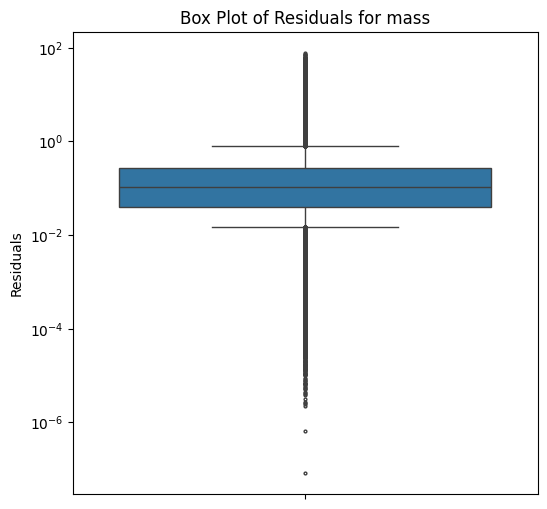

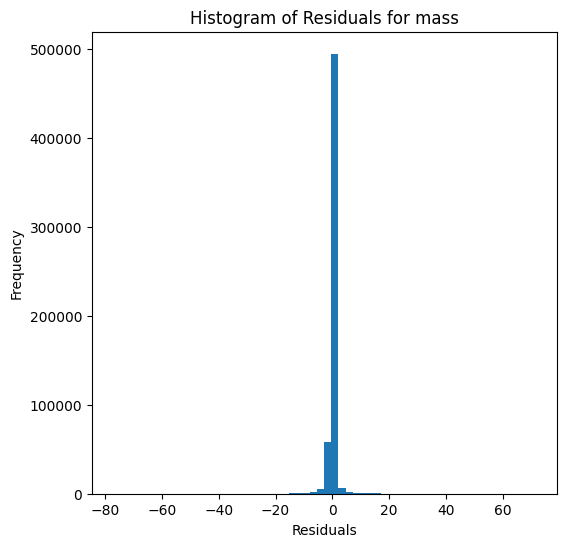

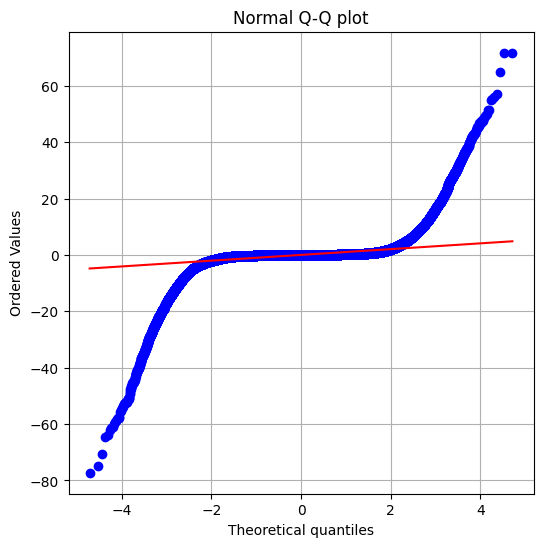


radius results:
RVE :  0.9996481242337533
RMSE :  0.015027578936809423
MAE :  0.011111087308668107
MedAE :  0.008599939320429906
CORR :  0.9998240595599841
MAX_ER :  0.4575838838578082
Percentiles : 
  75th percentile :  0.015391250289387148
  90th percentile :  0.02355907498143539
  95th percentile :  0.029664080528355424
  99th percentile :  0.04522336271217031



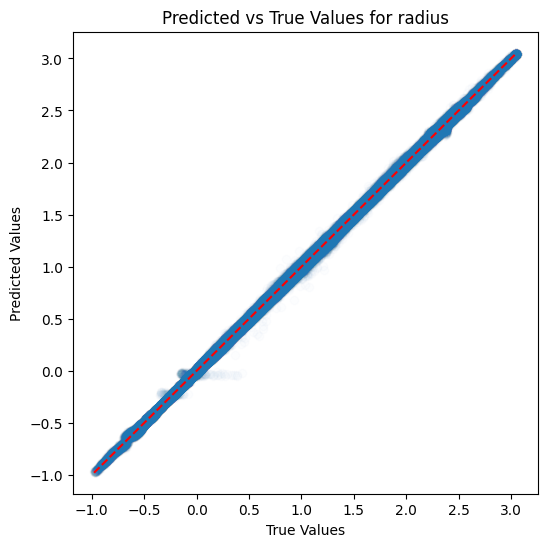

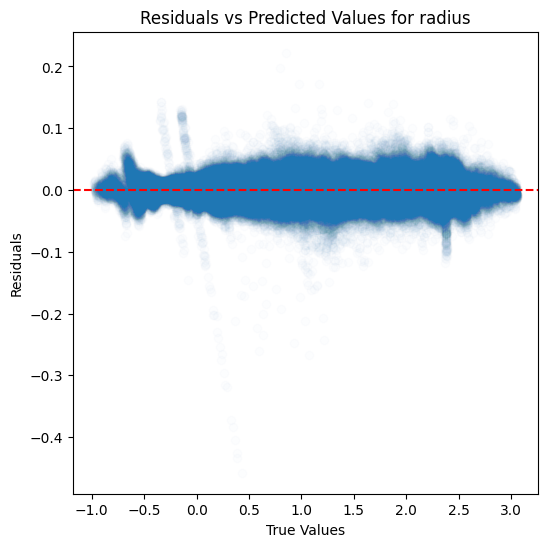

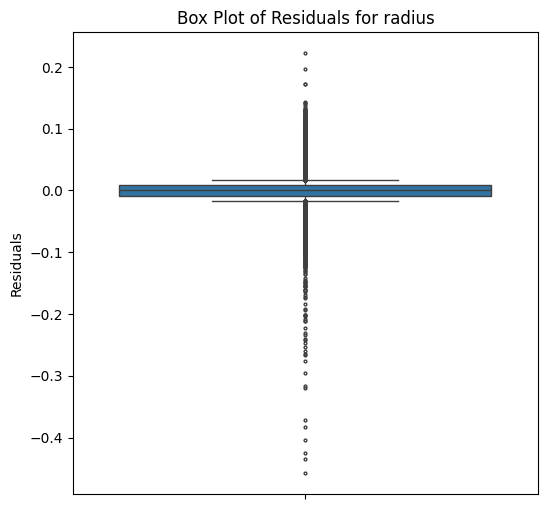

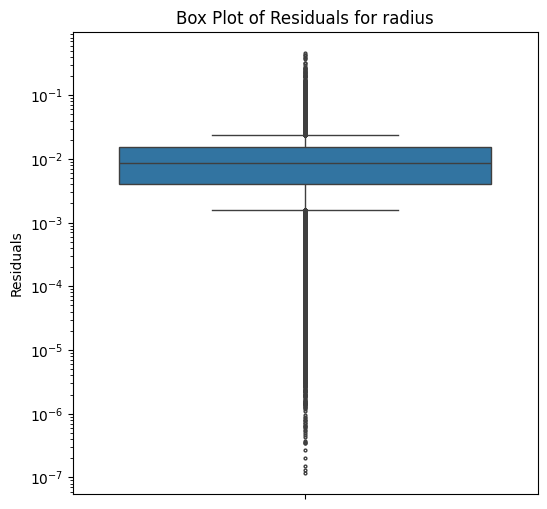

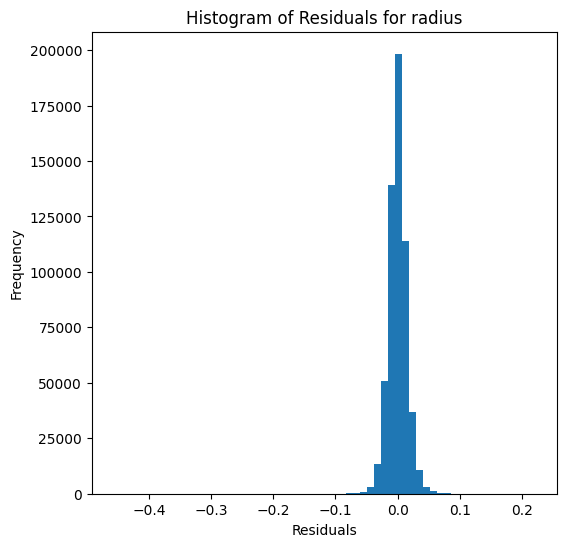

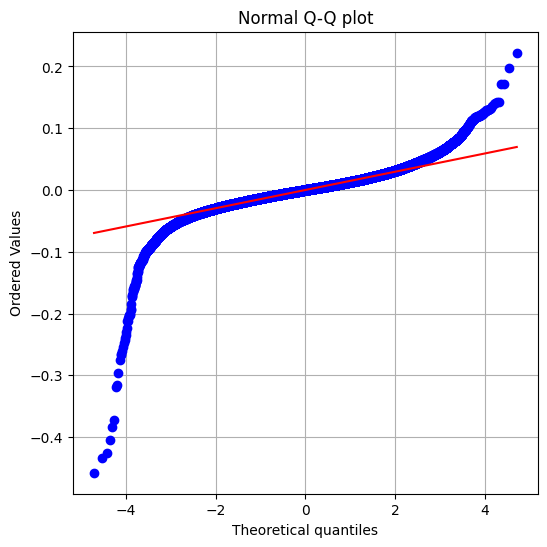

In [20]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [10]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_6 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.5280954026221805
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.916064205773352
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.563984209939404
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.6988352688527035
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.9622280729364983

mass results:
RVE :  0.984818623254154
RMSE :  3.044515981327664
MAE :  0.874026208236308
MedAE :  0.224059354335021
CORR :  0.9935730107890326
MAX_ER :  168.0098641712518
Percentiles : 
  75th percentile :  0.4903785690617194
  90th percentile :  1.5300810011841053
  95th percentile :  3.5909411789950667
  99th percentile :  13.521221645575203



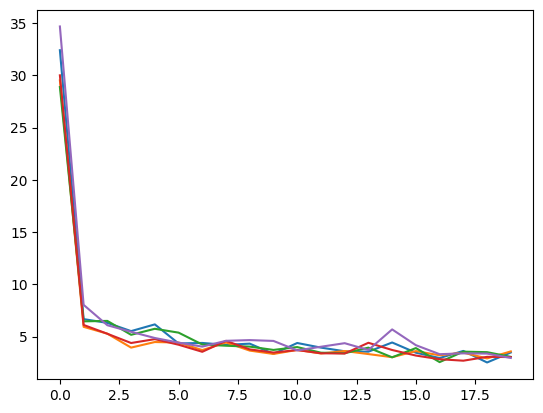

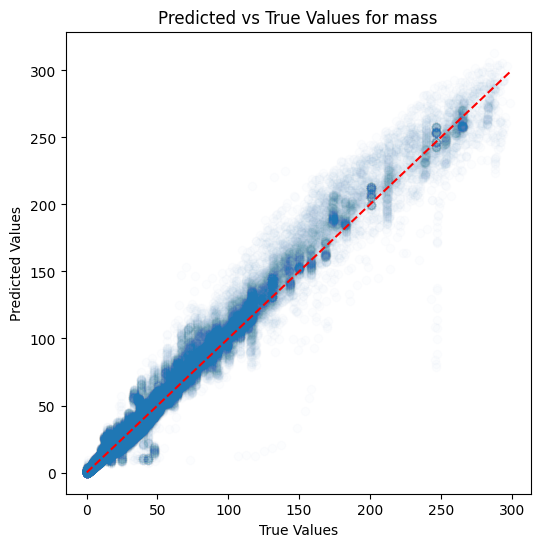

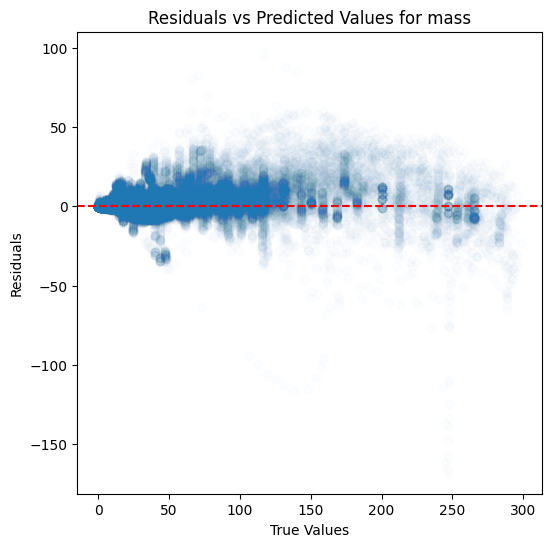

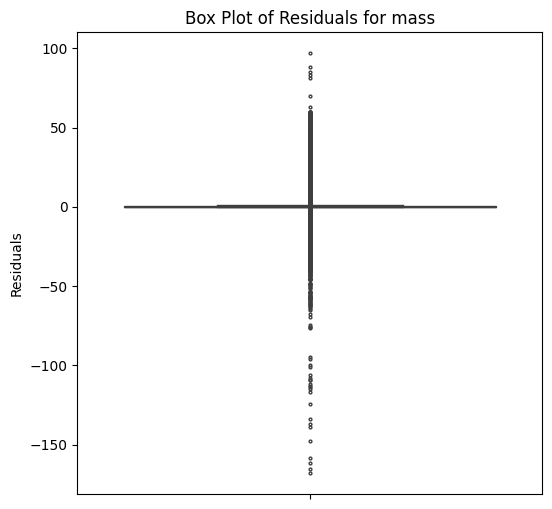

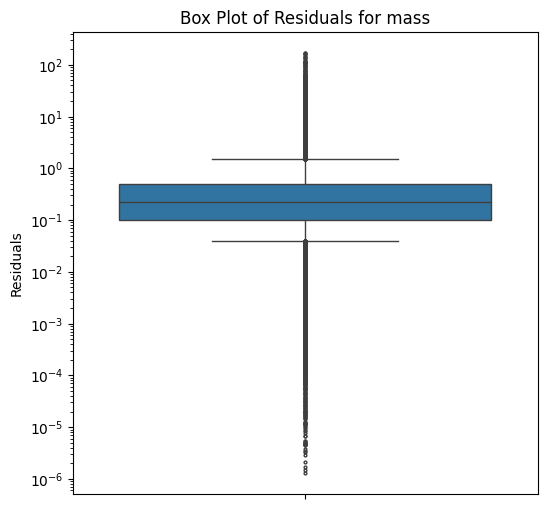

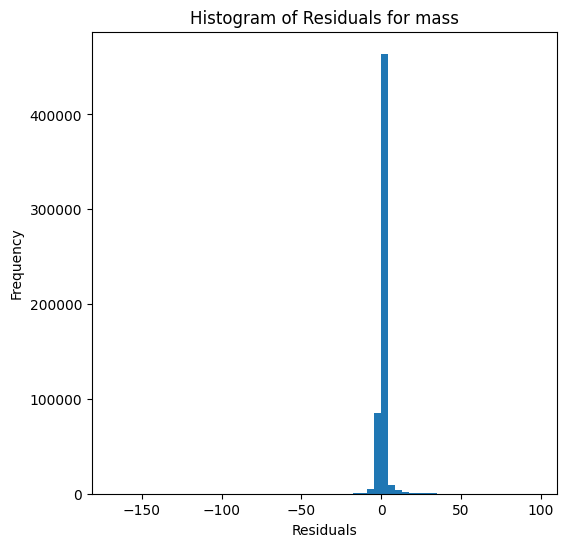

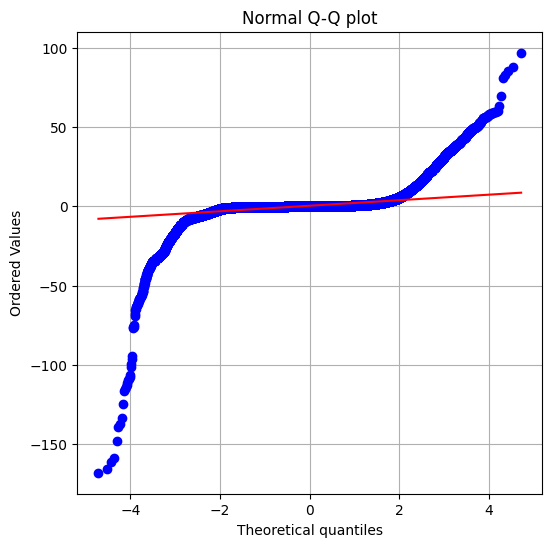


radius results:
RVE :  0.990032794666414
RMSE :  0.08582249204945341
MAE :  0.06309232802274042
MedAE :  0.04688901619977637
CORR :  0.9950039408873622
MAX_ER :  0.9416013058304955
Percentiles : 
  75th percentile :  0.08624456971699579
  90th percentile :  0.14012272124196334
  95th percentile :  0.17555567629315538
  99th percentile :  0.2634434579482345



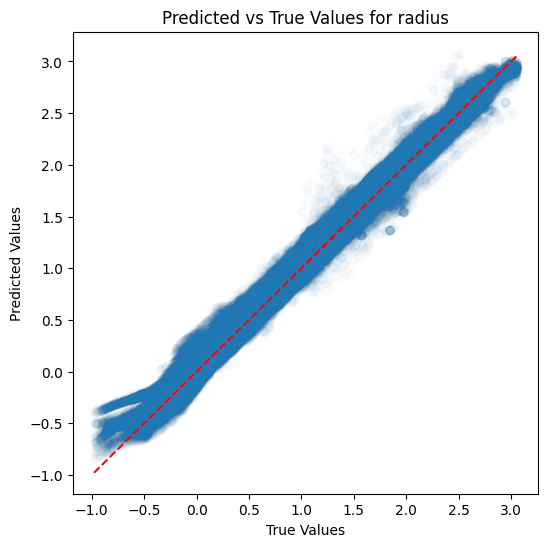

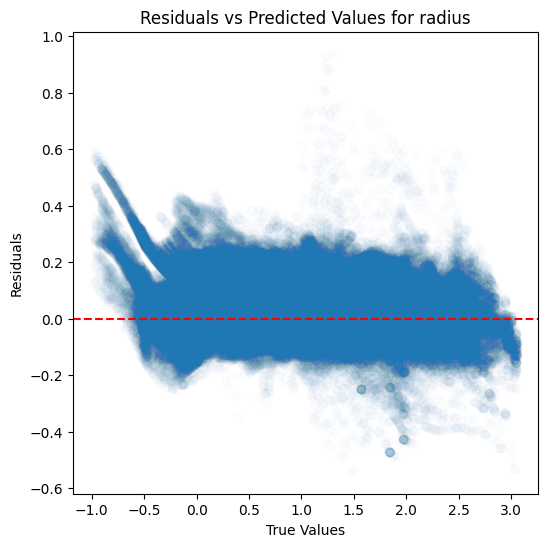

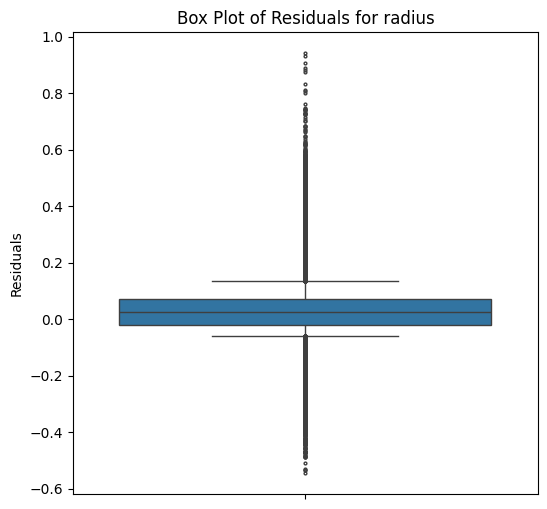

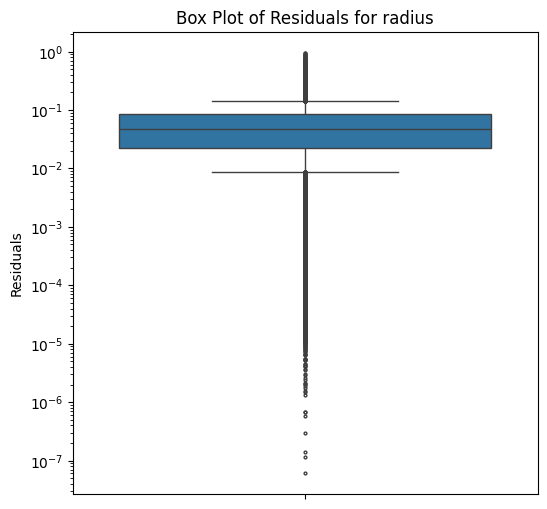

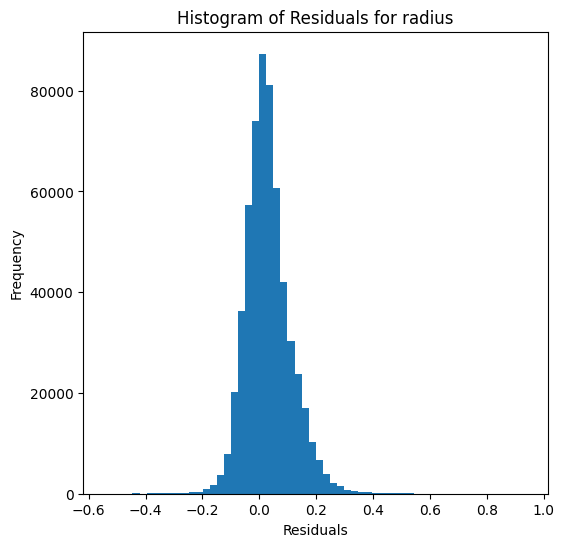

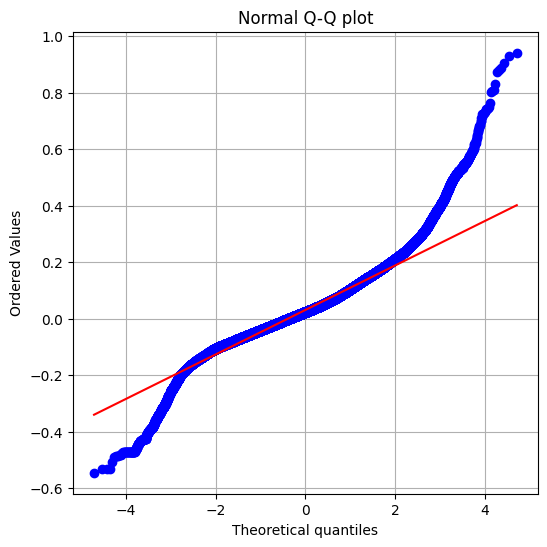

In [11]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)